In [9]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

C:\Users\mrity\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


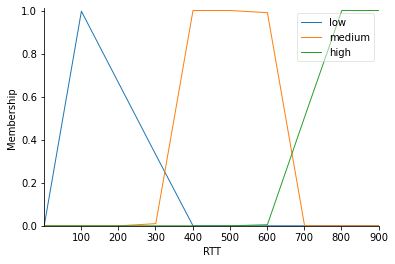

In [22]:
#maximum round trip time taken is 1000ms
RTT=ctrl.Antecedent(np.arange(1,1001,100),'RTT') #RTT is Round Trip time
RTT['low']=fuzzy.trimf(RTT.universe,(100,100,400))
RTT['medium']=fuzzy.trapmf(RTT.universe,[300,400,600,700])
RTT['high']=fuzzy.trapmf(RTT.universe,[600,800,1000,1000])
RTT.view()
plt.show()

C:\Users\mrity\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


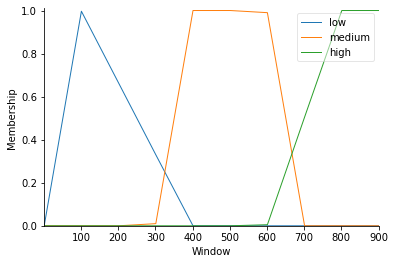

In [11]:
# Maximum window size taken is 1000 bits
Window=ctrl.Antecedent(np.arange(1,1001,100),'Window')
Window['low']=fuzzy.trimf(RTT.universe,(100,100,400))
Window['medium']=fuzzy.trapmf(RTT.universe,[300,400,600,700])
Window['high']=fuzzy.trapmf(RTT.universe,[600,800,1000,1000])
Window.view()
plt.show()

C:\Users\mrity\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


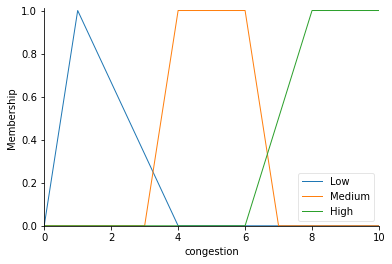

In [12]:
congestion=ctrl.Consequent(np.arange(0,11),'congestion')
congestion['Low']=fuzzy.trimf(congestion.universe,[1,1,4])
congestion['Medium']=fuzzy.trapmf(congestion.universe,[3,4,6,7])
congestion['High']=fuzzy.trapmf(congestion.universe,[6,8,10,10])
congestion.view()
plt.show()

In [23]:
rule1=ctrl.Rule(RTT['low'] & Window['low'], congestion['Low'])
rule2=ctrl.Rule(RTT['low'] & Window['medium'], congestion['Low'])
rule3=ctrl.Rule(RTT['low'] or Window['high'], congestion['High'])
rule4=ctrl.Rule(RTT['medium'] & Window['low'], congestion['Low'])
rule5=ctrl.Rule(RTT['medium'] & Window['medium'], congestion['Medium'])
rule6=ctrl.Rule(RTT['medium'] or Window['high'], congestion['High'])
rule7=ctrl.Rule(RTT['high'] or Window['low'], congestion['High'])
rule8=ctrl.Rule(RTT['high'] or Window['medium'], congestion['High'])
rule9=ctrl.Rule(RTT['high'] or Window['high'], congestion['High'])
rule=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]

In [14]:
x=ctrl.ControlSystem(rule)
y=ctrl.ControlSystemSimulation(x)

In [24]:
arr1= np.random.randint(1,1000, size=(100))
arr2= np.random.randint(1,1000, size=(100))
for indx in range(100):
    y.input['RTT']=arr1[indx]
   
    y.input['Window']=arr2[indx]
    y.compute()
    F=y.output['congestion']
    if(F>7.4):
        print("congestion  occured at",indx,"The Round Trip Time was:",arr1[indx],"The Window size was:",arr2[indx])
    
    

congestion  occured at 12 The Round Trip Time was: 990 The Window size was: 872
congestion  occured at 16 The Round Trip Time was: 866 The Window size was: 736
congestion  occured at 63 The Round Trip Time was: 886 The Window size was: 703
congestion  occured at 90 The Round Trip Time was: 770 The Window size was: 718
congestion  occured at 97 The Round Trip Time was: 748 The Window size was: 905
